# Reinforcement Learning 1: k-armed bandits

<BarContainer object of 10 artists>

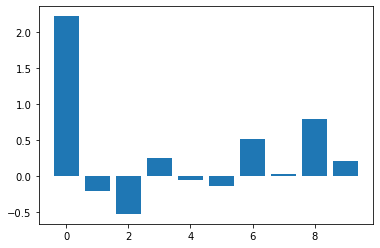

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Parameter Bandits:
mu = 0 #mean 0
sigma = 1 #unit variance
NrBandits = 10
x_q = np.linspace(0,9,10)
   
def init_q_star(mu, sigma, Nr):
    return np.random.normal(mu, sigma, Nr)

class Bandit:    
    def __init__(self, mu, sigma, NrBandits):
        self.sigma = sigma
        self.NrBandits = NrBandits
        self.mu = mu
        self.q_star = init_q_star(mu, sigma, NrBandits)

    def calc_reward(self, qx):
        qx = qx
        return np.random.normal(self.q_star[qx], self.sigma, 1)
Bandits = []
for i in range(2000):
    Bandits.append(Bandit(mu, sigma, NrBandits))
plt.bar(x_q, Bandits[0].q_star)

## 1. Run 1000 time steps for the generated 10-armed bandit problems and action-value algorithms

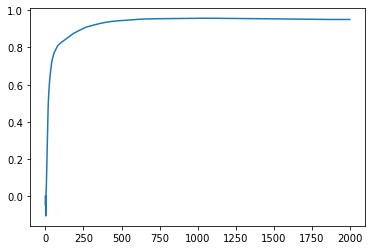

In [7]:
#Init Q, N = 0 for all qx:
e = 0.05
Q = [0 for i in range(10)]
N = [0 for i in range(10)]
R = [0 for i in range(2000)]
R_avg = [0 for i in range(2000)]
R_global = [0 for i in range(2000)]
x_r = np.linspace(0,2000,2000)

for j in range(2000):
    Q = [0 for i in range(10)]
    N = [0 for i in range(10)]
    R = [0 for i in range(2000)]
    R_avg = [0 for i in range(2000)]
    k = 0
    for i in range(2000):
        k = k + 1
        if (e < np.random.rand() or sum(Q[:]) == 0):
            A = np.argmax(Q) #takes greedy action
        else:
            A = np.random.randint(0,10) #generates a random action a to choose the reward from: q(a)
        R[i] = Bandits[j].calc_reward(A)
        N[A] = N[A] + 1
        Q[A] = Q[A] + 1/N[A]*(R[i]-Q[A])
        R_avg[i] = R_avg[i-1]+1/k*(R[i]-R_avg[i-1])
    k = 0
    for i in range(2000):
        k = k + 1
        R_global[i] = R_global[i-1]+1/k*(R_avg[i]-R_global[i-1])
    R_global = R_global/max(Bandits[j].q_star)

plt.plot(x_r, R_global)

[0.93212341]


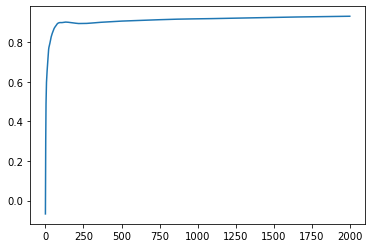

In [3]:
print(R_global[1999])
plt.plot(x_r, R_global)

<BarContainer object of 10 artists>

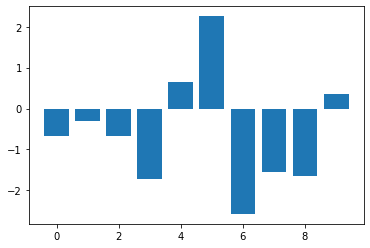

In [129]:
plt.bar(x_q, Bandits[0].q_star)